In [1]:
%load_ext autoreload
%autoreload 2
from Methods import JobOffers,dataframeHelpers

In [2]:
import os
import nltk
import re
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [3]:
autoreload JobOffers,dataframeHelpers

In [4]:
translatedOffers = JobOffers.readJsonFile("Data/output_v1.1.1000.translate.json")

In [5]:
jobsDf = dataframeHelpers.buildJobsDF("Data/output_v1.1.1000.translate.json")

In [6]:
jobsDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE
0,12220025,21420,[We are a successful and independent engineeri...,<p>Wir sind ein erfolgreiches und unabhängiges...,[BE],Kleinstunternehmen
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,[BE],Kleinstunternehmen
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,[BE],Kleinunternehmen
3,12473085,62100,[Administration Communale de Valderuzforstarti...,Administration communale de Val-de-RuzForstwar...,[NE],Kleinstunternehmen
4,12905109,26220;24210,[The Straumann Group is experiencing internati...,Le groupe Straumann connaît un succès internat...,[BE],Mittelunternehmen
...,...,...,...,...,...,...
995,17126875,24210,[Vallorbe SA Metallurgical factories are recog...,<p>Les Usines Métallurgiques de Vallorbe SA (U...,[VD],Mittelunternehmen
996,17140922,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Grossunternehmen
997,17140923,24210,[Back to Search Results Apply for this item Om...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Grossunternehmen
998,17060287,24210,[You are here HomePlayController Quality HF Qu...,Vous êtes ici :AccueilEmploisContrôleur qualit...,[BE],Kleinunternehmen


In [7]:
#Vika's file
VikaDf = pd.read_csv("Data/Environ_NonEnviron_Roberta_MJ.csv", sep=";")

In [8]:
#Emily's file
EmilyDf = pd.read_csv("Data/EmilyMJDifferentClassifications.csv", sep=";")

In [9]:
#All green's
GreenDf = pd.read_csv("Data/allGreenTranslated.csv", sep=";")

In [10]:
GreenDf = GreenDf.rename(columns ={"KANTONE":"CANTON"}) 


In [11]:
GreenDf = GreenDf.rename(columns ={"TRANSLATED_JOBS":"JOB_CONTENT"}) 


In [12]:
GreenDf = GreenDf.rename(columns ={"FIRMENGROESSE":"COMPANY_SIZE"}) 


In [13]:
GreenDf = GreenDf.rename(columns ={"ID":"JOB_ID"}) 


In [14]:
GreenDf

,Unnamed: 0,JOB_ID,ISCO,SKILLS,BRANCHE,ARBEITSORT,CANTON,COMPANY_SIZE,BERUFSERFAHRUNG,AUSBILDUNGSNIVEAU,ZUDATUM,ABDATUM,FIRMA,JOBTITEL,JOBS,CONTENT,CLEANED_JOBS,JOB_CONTENT,MJ
0,0,20533641,20000,Kommunikationsfähigkeit;Umwelt;Python;Umsicht;...,Öffentliche Verwaltung,CH-1211 Genève,GE,Kleinstunternehmen,NaN,MASTER,43971,44001.0,Office fédéral de météorologie et de climatolo...,Collaboratrice/ Collaborateur scientifique 80%,Wissenschaftlicher Assistent,<p>L'Office fédéral de météorologie et de clim...,L'Office fédéral de météorologie et de climato...,The Federal Meteorology and Climatology Office...,NaN
1,1,20141197,21430,Kommunikationsfähigkeit;Nachhaltigkeit;Modelli...,Umwelttechnik;Rechts- und Unternehmensberatung,Lausanne,VD,Mittelunternehmen,NaN,BACHELOR;MASTER;BASICEDUCATION;MATURA;CERTIFIC...,43892,44031.0,Quantis International SA,Senior Sustainability Consultant,Umweltberater,<h1>Senior Sustainability Consultant</h1> <h2>...,Senior Sustainability Consultant Why youll lov...,Senior Sustainability Consultant Why youll lov...,NaN
2,2,20912180,21430,Hydraulik;Eigenverantwortung;Verantwortungsbew...,Personalberatung,1920 Martigny,VS,Grossunternehmen,NaN,BACHELOR;MASTER;DIPLOMA;UAS;UNIVERSITY,44047,44054.0,Adecco,Ingénieur en environnement EPF ou HES orientat...,Umweltschutztechniker,À la recherche d'une nouvelle opportunité en t...,À la recherche d'une nouvelle opportunité en t...,In search of a new opportunity as an environne...,NaN
3,3,19968711,21310;21410,Umwelt;Ingenieurwesen;Mitarbeitermotivation;Un...,Rechts- und Unternehmensberatung,CH-1203 Genève,GE,Kleinunternehmen,Ingenieur-Jobs;Techniker-Jobs;Postdienste von ...,BACHELOR;MASTER;COLLEGE;DIPLOMA,43864,44004.0,Ecotec Environnement SA,Un·e Spécialiste en renaturation de cours d'ea...,Biologe;Wirtschaftsingenieur,<h1>Offre d'emploi Un·e Spécialiste en renatur...,Offre d'emploi Une Spécialiste en renaturation...,Job Posting A Specialist in Renaturation of Co...,NaN
4,4,20506366,23000,F#;Garten- und Landschaftsbau,Bildung,CH 1422 Grandson,VD,Kleinunternehmen,NaN,NaN,43965,43990.0,LE REPUIS,Un maître socioprofessionnel (H/F) à 100% sect...,Lehrer,<p><strong>Un maître socioprofessionnel (H/F) ...,Un maître socioprofessionnel HF à 100 secteur ...,A Socioprofessional Master HF to 100 Sector Ho...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,120,20933760,24310;24210,Kommunikationsfähigkeit;Planung;Datacap;Proble...,Bildung,Genève,GE,Mittelunternehmen,Unterrichtsassistent;Lagerist;Logistik-Jobs,BACHELOR;MASTER;BASICEDUCATION;MATURA;CERTIFIC...,44051,NaN,ESDA l’Ecole Supérieure de Droit et d’Administ...,Looking for a Market Data Analyst / Program Ma...,Programmverantwortlicher;Business Intelligence...,<p>Emploi</p> <p>ESDA is looking for a Market ...,Emploi ESDA is looking for a Market Data Analy...,Emploi ESDA is looking for a Market Data Analy...,NaN
121,121,21930428,26220;41200,Git;Texten und Überarbeiten;Problemstrukturier...,NPO,CH-1211 Genève,GE,Mittelunternehmen,Informatiker-Jobs;Projektmanagement-Jobs;Daten...,BACHELOR;MASTER;COLLEGE;DIPLOMA;UNIVERSITY,44251,44296.0,UNOG United Nations Office at Geneva,ASSISTANT DATA ANALYST,Data Scientist;Administrativer Assistent,Org. Setting and Reporting <p> This position i...,Org. Setting and Reporting This position is l...,Org. Setting and Reporting This position is l...,NaN
122,122,22071257,26220,Kommunikationsfähigkeit;Mobilität;Kommunikatio...,Grosshandel;Maschinenbau;Fahrzeugbau;Baugewerbe,CH-1208 Genève,GE,Grossunternehmen,NaN,BACHELOR;MASTER;BASICEDUCATION;MATURA;CERTIFIC...,44277,44298.0,Caterpillar Sarl,Caterpillar Graduate Program - Junior Business...,Absolvent;Data Scientist,<h1>Caterpillar Graduate Program - Junior Busi...,Caterpillar Graduate Program Junior Business ...,Caterpillar Graduate Program Junior Business ...,NaN
123,123,18359929,21490,Effektivität;Einrichtungen;Modellieren;Begeist...,Architektur und Planung,CH-1228 Plan-les-Ouates,GE,Kleinstunternehmen,Verlags-Jobs;A

In [15]:
VikaDfLabeled = VikaDf[~VikaDf["MJ"].isna()]

In [16]:
VikaDfLabeled = VikaDfLabeled.rename(columns ={"ID":"JOB_ID"}) 


In [17]:
GreenDf = GreenDf.rename(columns ={"ID":"JOB_ID"}) 


In [18]:
GreenDf = GreenDf[["JOB_ID", "MJ", "ISCO", "JOB_CONTENT", "CANTON", "COMPANY_SIZE" ]]

In [19]:
GreenDf["MJ"] = 1

In [20]:
GreenDf

,JOB_ID,MJ,ISCO,JOB_CONTENT,CANTON,COMPANY_SIZE
0,20533641,1,20000,The Federal Meteorology and Climatology Office...,GE,Kleinstunternehmen
1,20141197,1,21430,Senior Sustainability Consultant Why youll lov...,VD,Mittelunternehmen
2,20912180,1,21430,In search of a new opportunity as an environne...,VS,Grossunternehmen
3,19968711,1,21310;21410,Job Posting A Specialist in Renaturation of Co...,GE,Kleinunternehmen
4,20506366,1,23000,A Socioprofessional Master HF to 100 Sector Ho...,VD,Kleinunternehmen
...,...,...,...,...,...,...
120,20933760,1,24310;24210,Emploi ESDA is looking for a Market Data Analy...,GE,Mittelunternehmen
121,21930428,1,26220;41200,Org. Setting and Reporting This position is l...,GE,Mittelunternehmen
122,22071257,1,26220,Caterpillar Graduate Program Junior Business ...,GE,Grossunternehmen
123,18359929,1,21490,Energy Energy Management Raymond E. Moser has ...,GE,Kleinstunternehmen


In [21]:
pd.merge(VikaDfLabeled, jobsDf, on = "JOB_ID")

,JOB_ID,ISCO_x,SKILLS,BRANCHE,JOBTITEL,CONTENT,Content English,Predictions,MJ,Unnamed: 9,Unnamed: 10,ISCO_y,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE
0,12047533,31230;12190;21620,Kontaktfähigkeit;Anpassungsfähigkeit;Einsatzbe...,Land- und Forstwirtschaft;Baugewerbe,Landschaftsgärtner / -in als Vorarbeiter / Gru...,Bauführer / Gartenbautechniker HF Die Aemmer ...,bauführer horticultural technician hf\nthe aem...,Environ,1,NaN,NaN,31230;12190;21620,[Building leaders Horticultural technician HF ...,Bauführer / Gartenbautechniker HF\n\nDie Aemme...,[BE],Kleinstunternehmen
1,14422389,21620,Sozialrecht;Software-Entwicklungsprozess;Belas...,Bildung;Sozialwesen,Landschaftsgärtner/in (100%),Als Bildungs- und sozialpädagogisches Zentrum ...,as an educational and socio-pedagogical centre...,Environ,1,NaN,NaN,21620,[As an educational and social education center...,Als Bildungs- und sozialpädagogisches Zentrum ...,[BE],Kleinunternehmen
2,14616465,21420,Multitasking;Bauingenieurwesen;Microsoft Offic...,Architektur und Planung,Ingénieur en génie civil,Ingénieur en génie civil 1804 Corsier-sur-Ve...,civil engineering engineer\n\n\n1804 corsier-s...,Environ,1,NaN,NaN,21420,[Civil Engineer 1804 Corsiersurvey Engineering...,Ingénieur en génie civil\n\n\n1804 Corsier-sur...,[VD],Kleinstunternehmen
3,14617343,21620,Freizeitindustrie;Landschaftsarchitektur;Gesch...,NPO;Öffentliche Verwaltung,Praktikum Landschaftsentwicklung Naturpark Gan...,24.05.2017 Praktikum Landschaftsentwicklung N...,24.05.2017\n\npractical landscape development ...,Environ,1,NaN,NaN,21620,"[24, 05, 2017 Internship Landscape Developme...",24.05.2017\n\nPraktikum Landschaftsentwicklung...,[BE],Kleinstunternehmen
4,14515774,21430,Verhandlungsgeschick;Stellenbeschreibung;Diens...,Öffentliche Verwaltung,Fachspezialist/in Biodiversität 70 - 100%,Firmenportrait Das Amt für Wald des Kantons ...,company portrait \n\nthe amt für wald des cant...,Environ,1,NaN,NaN,21430,[Company portrait The office for the forest of...,Firmenportrait \n\nDas Amt für Wald des Kanton...,[BE],Mittelunternehmen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,7025892,21420,NaN,Architektur und Planung,dipl. Bauingenieur/in ETH / FH,* dipl. Bauingenieur/in ETH / FH * dipl. CAD-K...,Dipl. civil engineering in eth fh\n Dipl. c...,Non-Environ,pas de texte,NaN,NaN,21420,"[Dipl, Breafinery Eth fh Dipl, Cadostructors]",* dipl. Bauingenieur/in ETH / FH\n* dipl. CAD-...,[VS],Kleinunternehmen
383,18910435,24210,Volksgesundheit;Verantwortungsbewusstsein;Sich...,Baugewerbe;Architektur und Planung,"Responsable qualité, et répondant général sant..."," Responsable qualité, et répondant général sa...",responsible for quality and general health and...,Environ,pas de texte,NaN,NaN,24210,[Quality Manager and Respondent General Health...,"<i></i>\n<h4>Responsable qualité, et répondan...",[VD],Kleinstunternehmen
384,14008295,44190;24210,Qualitätsmanagement;Französisch,Lebensmittel,SPEZIALIST/IN QUALITÄTSSICHERUNG,FRDEEN * Home * Le groupe * Nos entreprises ...,frdeen\n\n home\n the group\n\n our compani...,Non-Environ,pas de texte,NaN,NaN,44190;24210,[FRDEEN HOME COMPANIES ESTAVAYER MILITY SA ELS...,FRDEEN\n\n* Home\n* Le groupe\n\n* Nos entrepr...,[FR],Mittelunternehmen
385,16921607,24210,Qualifizierung;Qualitätsmanagement;Computer Sy...,Pharma und Chemie,QA Manager Qualification/Validation/EM (Enviro...,Lonza is one of the world’s leading and most-t...,lonza is one of the world’s leading and most-...,Environ,pas de texte,NaN,NaN,24210,[Lonza is one of the worlds leading and mosttr...,<p>Lonza is one of the world’s leading and mos...,[VS],Grossunternehmen


In [22]:
len(VikaDfLabeled)

387

In [23]:
VikaDfLabeled = VikaDfLabeled[["JOB_ID", "MJ"]]


In [24]:
VikaDfLabeled

,JOB_ID,MJ
0,12047533,1
1,14422389,1
2,14616465,1
3,14617343,1
4,14515774,1
...,...,...
382,7025892,pas de texte
383,18910435,pas de texte
384,14008295,pas de texte
385,16921607,pas de texte


In [25]:
EmilyDf = EmilyDf[["JOB_ID", "MJ"]]


In [26]:
EmilyDf

,JOB_ID,MJ
0,13763695,False
1,12220025,False
2,14624002,False
3,12723029,False
4,14536882,True
5,11969310,True
6,13762077,True
7,13922235,False
8,13946158,False
9,13989853,True


In [27]:
#EmilyVikaDf = pd.merge(VikaDfLabeled, EmilyDf, on = "JOB_ID")

In [28]:
EmilyVikaDf = VikaDfLabeled.append(EmilyDf)

In [29]:
EmilyVikaDf

,JOB_ID,MJ
0,12047533,1
1,14422389,1
2,14616465,1
3,14617343,1
4,14515774,1
...,...,...
25,13762804,False
26,14239400,True
27,13823543,True
28,12723027,False


In [30]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("pas de texte", 0)

In [31]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("?", 0)

In [32]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("True", 1)

In [33]:
EmilyVikaDf["MJ"]=EmilyVikaDf["MJ"].replace("true", 1)

In [34]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("TRUE", 1)

In [35]:
EmilyVikaDf["MJ"]=EmilyVikaDf["MJ"].replace("False", 0)

In [36]:
EmilyVikaDf["MJ"]=EmilyVikaDf["MJ"].replace("false", 0)

In [37]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("FALSE", 0)

In [38]:
EmilyVikaDf["MJ"].value_counts()

1                    165
non                  135
0                    100
True                  14
no job offer text      1
same as above          1
no                     1
Name: MJ, dtype: int64

In [39]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("same as above", 0)

In [40]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("non", 0)

In [41]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("no job offer text", 0)

In [51]:
EmilyVikaDf["MJ"].value_counts()

0    237
1    180
Name: MJ, dtype: int64

In [44]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("True", 1)

In [45]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("no", 1)

In [46]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("?", 0)

In [47]:
EmilyVikaDf["MJ"].value_counts()

0    237
1    165
1     15
Name: MJ, dtype: int64

In [48]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("1", 1)

In [49]:
EmilyVikaDf["MJ"] = EmilyVikaDf["MJ"].replace("0", 0)

In [52]:
EmilyVikaDf["MJ"].value_counts()

0    237
1    180
Name: MJ, dtype: int64

In [56]:
EmilyVikaDf["MJ"].value_counts()

False    237
True     180
Name: MJ, dtype: int64

In [57]:
emilyVikaJobsMergedDf = EmilyVikaDf[["JOB_ID", "MJ"]].merge(jobsDf, on="JOB_ID", how="outer")

In [58]:
emilyVikaJobsMergedDf

,JOB_ID,MJ,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE
0,12047533.0,True,31230;12190;21620,[Building leaders Horticultural technician HF ...,Bauführer / Gartenbautechniker HF\n\nDie Aemme...,[BE],Kleinstunternehmen
1,14422389.0,True,21620,[As an educational and social education center...,Als Bildungs- und sozialpädagogisches Zentrum ...,[BE],Kleinunternehmen
2,14616465.0,True,21420,[Civil Engineer 1804 Corsiersurvey Engineering...,Ingénieur en génie civil\n\n\n1804 Corsier-sur...,[VD],Kleinstunternehmen
3,14617343.0,True,21620,"[24, 05, 2017 Internship Landscape Developme...",24.05.2017\n\nPraktikum Landschaftsentwicklung...,[BE],Kleinstunternehmen
4,14515774.0,True,21430,[Company portrait The office for the forest of...,Firmenportrait \n\nDas Amt für Wald des Kanton...,[BE],Mittelunternehmen
...,...,...,...,...,...,...,...
995,16995903.0,NaN,24210,[The Department of Social Affairs of Biel is l...,<b>Die Abteilung Soziales</b> der Stadt Biel s...,[BE],Kleinunternehmen
996,17136796.0,NaN,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Kleinunternehmen
997,17140922.0,NaN,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Grossunternehmen
998,17140923.0,NaN,24210,[Back to Search Results Apply for this item Om...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Grossunternehmen


In [80]:
mergedDf = emilyVikaJobsMergedDf[emilyVikaJobsMergedDf.columns.intersection(GreenDf.columns)].append(GreenDf)

In [81]:
mergedDf = mergedDf.reset_index()

In [82]:
mergedDf["MJ"].value_counts()

True     305
False    237
Name: MJ, dtype: int64

In [142]:
mergedDf["CANTON"] = mergedDf.apply(lambda x: x["CANTON"].split(";") if type(x["CANTON"]) == str else x["CANTON"], axis=1)

In [143]:
labeledDf = mergedDf[~mergedDf["MJ"].isna()]

In [144]:
labeledDf["MJ"] = labeledDf["MJ"].astype('bool')

<ipython-input-144-c9fa01c0230e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeledDf["MJ"] = labeledDf["MJ"].astype('bool')


In [145]:
labeledDf["MJ"].value_counts()

True     305
False    237
Name: MJ, dtype: int64

In [146]:
labeledDf["CANTON1"] = labeledDf.apply(lambda x: x["CANTON"][0] if type(x["CANTON"]) != str else x["CANTON"], axis=1)

<ipython-input-146-96d5d36165db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeledDf["CANTON1"] = labeledDf.apply(lambda x: x["CANTON"][0] if type(x["CANTON"]) != str else x["CANTON"], axis=1)


In [150]:
labeledDf.to_csv("mergedAnnotatedJobsDf.csv")

8 8 7


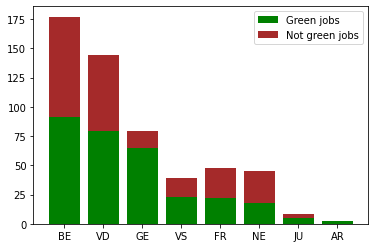

In [149]:
values = labeledDf["CANTON1"].value_counts()
valuesGreen = labeledDf[labeledDf["MJ"]]["CANTON1"].value_counts()
valuesNotGreen = labeledDf[~labeledDf["MJ"]]["CANTON1"].value_counts()
print(len(values), len(valuesGreen), len(valuesNotGreen))
plt.bar(valuesGreen.index, valuesGreen, color='green', label="Green jobs")
plt.bar(valuesNotGreen.index, valuesNotGreen, bottom=valuesGreen[valuesNotGreen.index], color="brown", label="Not green jobs")
plt.legend()

In [148]:
values


BE    177
VD    144
GE     79
FR     48
NE     45
VS     39
JU      8
AR      2
Name: CANTON1, dtype: int64

In [128]:
valuesGreen

BE    91
G     52
V     52
VD    37
VS    13
GE    13
FR    11
F     11
NE    10
N      8
JU     5
A      2
Name: CANTON1, dtype: int64

In [135]:
jobsDf["CANTON"].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[BE]                    379
[VD]                    234
[NE]                    103
[FR]                     92
[VS]                     78
[GE]                     78
[JU]                     15
[VD, NE]                  1
[NE, FR]                  1
[BE, NE]                  1
[GE, VD]                  1
[FR, VD]                  1
[BE, VS]                  1
[NE, FR]                  1
[GE, VD]                  1
[BE, VS]                  1
[BE, VS]                  1
[BE, NE]                  1
[BE, NE]                  1
[VD, NE]                  1
[NE, FR]                  1
[NE, FR]                  1
[LI, VD]                  1
[NE, FR]                  1
[BE, VS]                  1
[NE, VS, GE, VD, FR]      1
[VD, NE]                  1
[BE]                      1
Name: CANTON, dtype: int64